In [4]:
import numpy as np
import matplotlib.pyplot as plt
import eleanor
##############################################################################
# eleanor agruments:
#eleanor.version, eleanor.mast, eleanor.ffi, eleanor.utils, eleanor.maxsector, 
#eleanor.update, eleanor.source, eleanor.postcard, eleanor.targetdata, 
#eleanor.visualize, eleanor.eleanor, eleanor.crossmatch, eleanor
##############################################################################

In [5]:
has_ffi = [219820925, 80313923, 229945862, 440765193, 8591766, 417544924, 
           144599609, 207440438, 219094190, 233095291, 219114641, 233067231, 
           233075513, 219897252, 233205654]

In [18]:
star = eleanor.Source(tic=219820925)

print('Found TIC {0} (Gaia {1}), with TESS magnitude {2}, RA {3}, and Dec {4}'
     .format(star.tic, star.gaia, star.tess_mag, star.coords[0], star.coords[1]))

No eleanor postcard has been made for your target (yet). Using TessCut instead.
Found TIC 219820925 (Gaia 1435190745326633984), with TESS magnitude 6.68109, RA 268.105732008899, and Dec 60.3963722975986


In [7]:
data = eleanor.TargetData(star, height=15, width=15, bkg_size=31, do_psf=True, do_pca=True, regressors='corner')

100%|██████████| 1148/1148 [00:21<00:00, 53.11it/s]


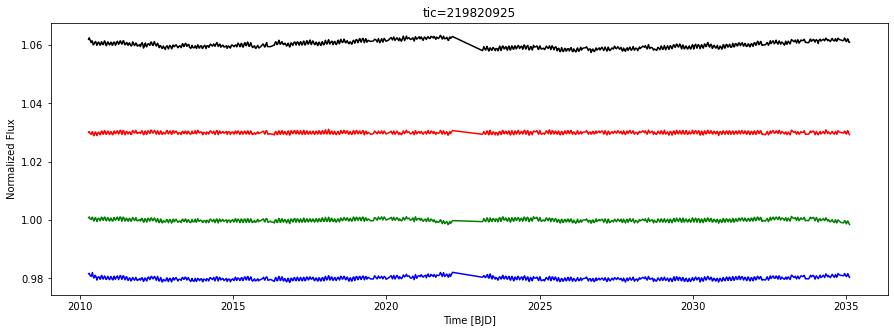

In [8]:
plt.figure(figsize=(15,5))

q = data.quality == 0

plt.plot(data.time[q], data.raw_flux[q]/np.nanmedian(data.raw_flux[q])+0.06, 'k')
plt.plot(data.time[q], data.corr_flux[q]/np.nanmedian(data.corr_flux[q]) + 0.03, 'r')
plt.plot(data.time[q], data.pca_flux[q]/np.nanmedian(data.pca_flux[q]), 'g')
plt.plot(data.time[q], data.psf_flux[q]/np.nanmedian(data.psf_flux[q]) - 0.02, 'b')
plt.ylabel('Normalized Flux')
plt.xlabel('Time [BJD]')
plt.title('tic=219820925');
#Plotted below are the following: 
#- Black : the raw light curve (aperture × TPF + background subtraction) 
#- Red : the corrected light curve (black light curve + additional corrections) 
#- Green : the PCA light curve (aperture × TPF + background subtraction + cotrending basis vectors) 
#- Blue : the PSF modeled light curve

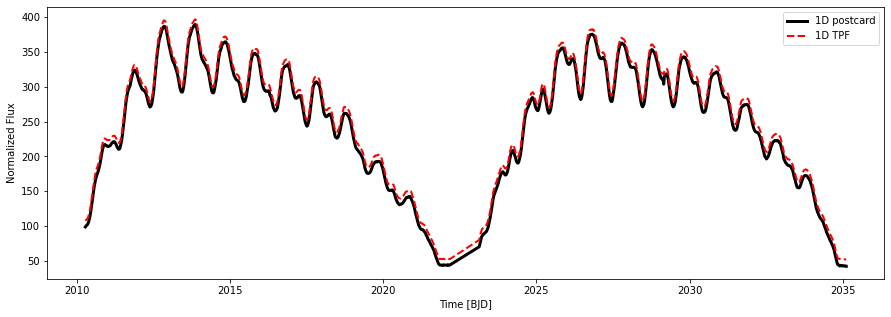

In [9]:
# Background removal
plt.figure(figsize=(15,5))

plt.plot(data.time, data.flux_bkg, 'k', label='1D postcard', linewidth=3)
plt.plot(data.time, data.tpf_flux_bkg, 'r--', label='1D TPF', linewidth=2)
plt.ylabel('Normalized Flux')
plt.xlabel('Time [BJD]')
plt.legend();

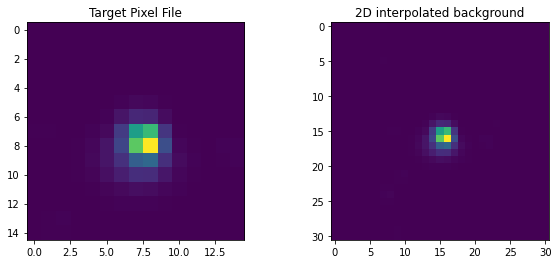

In [10]:
# frame of 2d background
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,4))
ax1.imshow(data.tpf[0])
ax1.set_title('Target Pixel File')
ax2.imshow(data.bkg_tpf[0])
ax2.set_title('2D interpolated background');

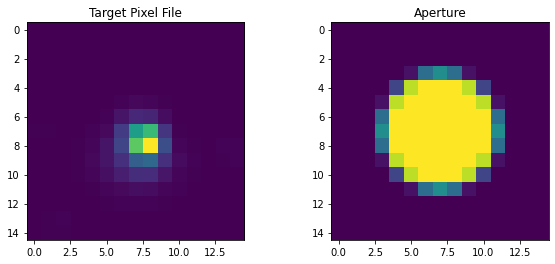

In [11]:
# aperture and comparison to where star falls on tpf
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,4))
ax1.imshow(data.tpf[0])
ax1.set_title('Target Pixel File')
ax2.imshow(data.aperture)
ax2.set_title('Aperture');

In [14]:
# save to fits file
#data.save('/Users/mkunz/Tess_JWST_calibration_stars/data_FFI_using_eleanor')

<AxesSubplot:xlabel='Time - 2457000 [BTJD days]', ylabel='Flux'>

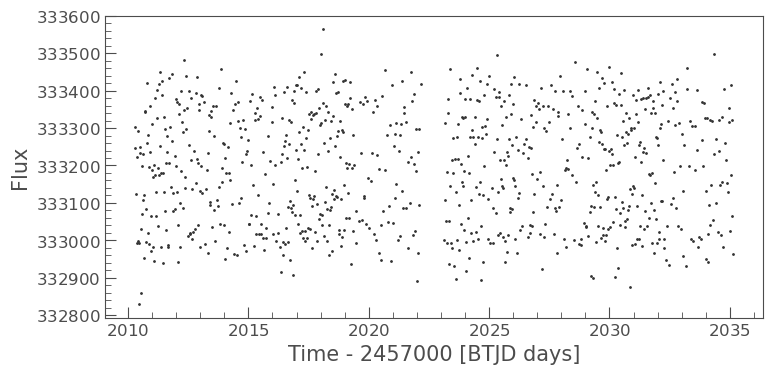

In [16]:
lk = data.to_lightkurve()
lk.scatter()

In [19]:
# do all sectors now...
star = eleanor.multi_sectors(tic=219820925, sectors='all')

Found star in Sector(s) 14 15 16 17 18 20 21 22 23 24 25 26
Most recent sector available =  37
Inflating...
This is the first light curve you have made for this sector. Getting eleanor metadata products for Sector 14...
This will only take a minute, and only needs to be done once. Any other light curves you make in this sector will be faster.
Acquiring target...
Calculating Cadences...
Assuring Quality Flags...
Making CBVs...
Success! Sector 14 now available.
No eleanor postcard has been made for your target (yet). Using TessCut instead.


Inflating...
Most recent sector available =  37
Inflating...
This is the first light curve you have made for this sector. Getting eleanor metadata products for Sector 15...
This will only take a minute, and only needs to be done once. Any other light curves you make in this sector will be faster.
Acquiring target...
Calculating Cadences...
Assuring Quality Flags...
Making CBVs...
Success! Sector 15 now available.
No eleanor postcard has been made for your target (yet). Using TessCut instead.


Inflating...
Most recent sector available =  37
Inflating...
This is the first light curve you have made for this sector. Getting eleanor metadata products for Sector 16...
This will only take a minute, and only needs to be done once. Any other light curves you make in this sector will be faster.
Acquiring target...
Calculating Cadences...
Assuring Quality Flags...
Making CBVs...
Success! Sector 16 now available.
No eleanor postcard has been made for your target (yet). Using TessCut instead.


Inflating...
Most recent sector available =  37
Inflating...
This is the first light curve you have made for this sector. Getting eleanor metadata products for Sector 17...
This will only take a minute, and only needs to be done once. Any other light curves you make in this sector will be faster.
Acquiring target...
Calculating Cadences...
Assuring Quality Flags...
Making CBVs...
Success! Sector 17 now available.
No eleanor postcard has been made for your target (yet). Using TessCut instead.


Inflating...
Most recent sector available =  37
Inflating...
This is the first light curve you have made for this sector. Getting eleanor metadata products for Sector 18...
This will only take a minute, and only needs to be done once. Any other light curves you make in this sector will be faster.
Acquiring target...
Calculating Cadences...
Assuring Quality Flags...
Making CBVs...
Success! Sector 18 now available.
No eleanor postcard has been made for your target (yet). Using TessCut instead.


Inflating...
Most recent sector available =  37
Inflating...
This is the first light curve you have made for this sector. Getting eleanor metadata products for Sector 20...
This will only take a minute, and only needs to be done once. Any other light curves you make in this sector will be faster.
Acquiring target...
Calculating Cadences...
Assuring Quality Flags...
Making CBVs...
Success! Sector 20 now available.
No eleanor postcard has been made for your target (yet). Using TessCut instead.


Inflating...
Most recent sector available =  37
Inflating...
This is the first light curve you have made for this sector. Getting eleanor metadata products for Sector 21...
This will only take a minute, and only needs to be done once. Any other light curves you make in this sector will be faster.
Acquiring target...
Calculating Cadences...
Assuring Quality Flags...
Making CBVs...
Success! Sector 21 now available.
No eleanor postcard has been made for your target (yet). Using TessCut instead.


Inflating...
Most recent sector available =  37
Inflating...
This is the first light curve you have made for this sector. Getting eleanor metadata products for Sector 22...
This will only take a minute, and only needs to be done once. Any other light curves you make in this sector will be faster.
Acquiring target...
Calculating Cadences...
Assuring Quality Flags...
Making CBVs...
Success! Sector 22 now available.
No eleanor postcard has been made for your target (yet). Using TessCut instead.


Inflating...
Most recent sector available =  37
Inflating...
This is the first light curve you have made for this sector. Getting eleanor metadata products for Sector 23...
This will only take a minute, and only needs to be done once. Any other light curves you make in this sector will be faster.
Acquiring target...
Calculating Cadences...
Assuring Quality Flags...
Making CBVs...
Success! Sector 23 now available.
No eleanor postcard has been made for your target (yet). Using TessCut instead.


Inflating...
Most recent sector available =  37
Inflating...
This is the first light curve you have made for this sector. Getting eleanor metadata products for Sector 24...
This will only take a minute, and only needs to be done once. Any other light curves you make in this sector will be faster.
Acquiring target...
Calculating Cadences...
Assuring Quality Flags...
Making CBVs...
Success! Sector 24 now available.
No eleanor postcard has been made for your target (yet). Using TessCut instead.


Inflating...
Most recent sector available =  37
Inflating...
This is the first light curve you have made for this sector. Getting eleanor metadata products for Sector 25...
This will only take a minute, and only needs to be done once. Any other light curves you make in this sector will be faster.
Acquiring target...
Calculating Cadences...
Assuring Quality Flags...
Making CBVs...
Success! Sector 25 now available.
No eleanor postcard has been made for your target (yet). Using TessCut instead.


Inflating...
No eleanor postcard has been made for your target (yet). Using TessCut instead.


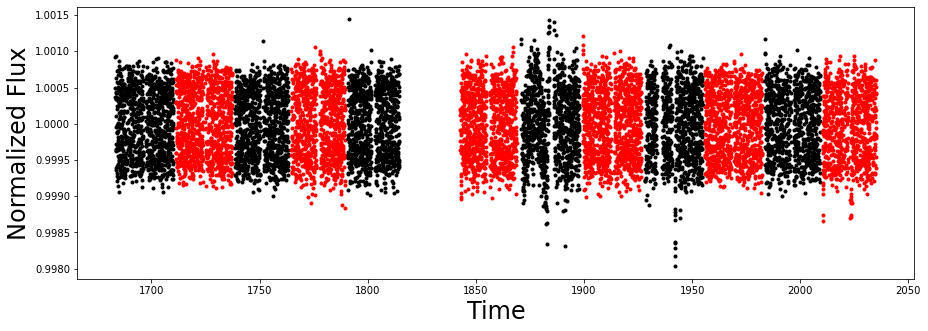

In [22]:
plt.figure(figsize=(15,5))

data = []
plot_fmt = ['k.', 'r.','k.', 'r.','k.', 'r.','k.', 'r.','k.', 'r.','k.', 'r.']

for s in star:
    datum = eleanor.TargetData(s, height=15, width=15, bkg_size=31, do_psf=False, do_pca=False)
    data.append(datum)
    
for sector, datum in enumerate(data):
    q = datum.quality == 0
    plt.plot(datum.time[q], datum.corr_flux[q]/np.median(datum.corr_flux[q]), plot_fmt[sector])

plt.ylabel('Normalized Flux', fontsize=24)
plt.xlabel('Time', fontsize=24)

plt.show()


In [26]:
import csv
import lightkurve as lk

In [28]:
with open('data_eleanorFFIs.csv', 'w', newline='') as csvfile:
    spamwriter = csv.writer(csvfile, delimiter=',', dialect='excel')
    spamwriter.writerow(['star', 'sector', 'std of lc', 'best period [days] [range 0-1 days]', 'max amplitude [e- s-] [range 0-1 days]', 'average amplitude [range 0-1 days]', 'best period [days] [range .9-5 days]', 'max amplitude [e- s-] [range .9-5 days]', 'average amplitude [range .9-5 days]', 'mean noise level [sigma_amp]'])

    for FFI_sector in star:
        data = eleanor.TargetData(FFI_sector, height=15, width=15, bkg_size=31, do_psf=True, do_pca=True, regressors='corner')
        lc = data.to_lightkurve()
        #lk.scatter()
        flat_lc = lc.flatten(window_length=1501).remove_outliers().remove_nans()
        # lightkurve's periodogram
        # periodogram 1 from 0-1 days
        # periodogram 2 from .9-5 days
        pgram = flat_lc.to_periodogram(method='lombscargle', normalization='amplitude', maximum_period=1, oversample_factor = 10)  #freq_unit='microhertz'
        pgram2 = flat_lc.to_periodogram(method='lombscargle', normalization='amplitude', minimum_period=.9, maximum_period=5, oversample_factor = 10)  #freq_unit='microhertz'

        N = len(flat_lc.time.value)
        sigma_rms = np.std(flat_lc.flux.value)
        # mean noise level in amplitude spectrum
        sigma_amp = np.sqrt(np.pi/N)*sigma_rms
        '''
        # plotting periodograms for 0-1 days and 1-5 days with avg noise level in blue
        pgram.plot()
        plt.hlines(sigma_amp, 0, 1)
        plt.ylabel('Amplitude')
        plt.show()
        plt.close()

        pgram2.plot()
        plt.hlines(sigma_amp, .9, 5)
        plt.ylabel('Amplitude')
        plt.show()
        plt.close()
        '''
        a = 'TIC 219820925'
        b = flat_lc.sector
        c = np.std(flat_lc.flux.value)
        d = pgram.period_at_max_power.value
        e = pgram.max_power.value
        f = np.mean(pgram.power.value)
        g = pgram2.period_at_max_power.value
        h = pgram2.max_power.value
        i = np.mean(pgram2.power.value)
        j = sigma_amp

        spamwriter.writerow([a] + [b] + [c] + [d] + [e] + [f] + [g] + [h] + [i] + [j])

100%|██████████| 1266/1266 [00:25<00:00, 49.42it/s]
/Users/mkunz/miniconda3/envs/environment2/lib/python3.7/site-packages/astropy/units/quantity.py:477: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
100%|██████████| 1248/1248 [00:24<00:00, 50.42it/s]
/Users/mkunz/miniconda3/envs/environment2/lib/python3.7/site-packages/astropy/units/quantity.py:477: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
100%|██████████| 1238/1238 [00:24<00:00, 49.90it/s]
/Users/mkunz/miniconda3/envs/environment2/lib/python3.7/site-packages/astropy/units/quantity.py:477: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
100%|██████████| 1148/1148 [00:23<00:00, 48.70it/s]
/Users/mkunz/miniconda3/envs/environment2/lib/python3.7/site-packages/astropy/units/quantity.py:477: RuntimeWarning: invali

In [57]:
print(eleanor.multi_sectors(tic=229945862, sectors='all'))

Found star in Sector(s) 14 15 16 17 18 19 20 21 22 23 24 25 26
No eleanor postcard has been made for your target (yet). Using TessCut instead.
Inflating...


No eleanor postcard has been made for your target (yet). Using TessCut instead.
Inflating...


No eleanor postcard has been made for your target (yet). Using TessCut instead.
Inflating...


No eleanor postcard has been made for your target (yet). Using TessCut instead.
Inflating...


No eleanor postcard has been made for your target (yet). Using TessCut instead.
Inflating...
Most recent sector available =  37
Inflating...
This is the first light curve you have made for this sector. Getting eleanor metadata products for Sector 19...
This will only take a minute, and only needs to be done once. Any other light curves you make in this sector will be faster.
Acquiring target...
Calculating Cadences...
Assuring Quality Flags...
Making CBVs...
Success! Sector 19 now available.
No eleanor postcard has been made for your target (yet). Using TessCut instead.


Inflating...


No eleanor postcard has been made for your target (yet). Using TessCut instead.
Inflating...


No eleanor postcard has been made for your target (yet). Using TessCut instead.
Inflating...


No eleanor postcard has been made for your target (yet). Using TessCut instead.
Inflating...


No eleanor postcard has been made for your target (yet). Using TessCut instead.
Inflating...


No eleanor postcard has been made for your target (yet). Using TessCut instead.
Inflating...


No eleanor postcard has been made for your target (yet). Using TessCut instead.
Inflating...
No eleanor postcard has been made for your target (yet). Using TessCut instead.
[<eleanor.source.Source object at 0x7f9e00b8c6a0>, <eleanor.source.Source object at 0x7f9dfabe32e8>, <eleanor.source.Source object at 0x7f9dfc255908>, <eleanor.source.Source object at 0x7f9dfd186b00>, <eleanor.source.Source object at 0x7f9dfb5ee160>, <eleanor.source.Source object at 0x7f9e13a68080>, <eleanor.source.Source object at 0x7f9dfafc9518>, <eleanor.source.Source object at 0x7f9e168692b0>, <eleanor.source.Source object at 0x7f9dfacc9f98>, <eleanor.source.Source object at 0x7f9dfd6bde48>, <eleanor.source.Source object at 0x7f9e16930fd0>, <eleanor.source.Source object at 0x7f9dfc684828>, <eleanor.source.Source object at 0x7f9e156b1d30>]


In [58]:
# already did TIC 219820925 so now for the rest of them...
has_ffi = [219820925, 80313923, 229945862, 440765193, 8591766, 417544924, 
           144599609, 207440438, 219094190, 233095291, 219114641, 233067231, 
           233075513, 219897252, 233205654]
with open('data_eleanorFFIs.csv', 'w', newline='') as csvfile:
    spamwriter = csv.writer(csvfile, delimiter=',', dialect='excel')
    spamwriter.writerow(['star', 'sector', 'std of lc', 'best period [days] [range 0-1 days]', 'max amplitude [e- s-] [range 0-1 days]', 'average amplitude [range 0-1 days]', 'best period [days] [range .9-5 days]', 'max amplitude [e- s-] [range .9-5 days]', 'average amplitude [range .9-5 days]', 'mean noise level [sigma_amp]'])
        
    star_data_all_sectors = eleanor.multi_sectors(tic=229945862, sectors='all')
    for FFI_sector in star_data_all_sectors:
        data = eleanor.TargetData(FFI_sector, height=15, width=15, bkg_size=31, do_psf=True, do_pca=True, regressors='corner')
        lc = data.to_lightkurve()
        #lk.scatter()
        flat_lc = lc.flatten(window_length=1501).remove_outliers().remove_nans()
        # lightkurve's periodogram
        # periodogram 1 from 0-1 days
        # periodogram 2 from .9-5 days
        pgram = flat_lc.to_periodogram(method='lombscargle', normalization='amplitude', maximum_period=1, oversample_factor = 10)  #freq_unit='microhertz'
        pgram2 = flat_lc.to_periodogram(method='lombscargle', normalization='amplitude', minimum_period=.9, maximum_period=5, oversample_factor = 10)  #freq_unit='microhertz'

        N = len(flat_lc.time.value)
        sigma_rms = np.std(flat_lc.flux.value)
        # mean noise level in amplitude spectrum
        sigma_amp = np.sqrt(np.pi/N)*sigma_rms
        '''
        # plotting periodograms for 0-1 days and 1-5 days with avg noise level in blue
        pgram.plot()
        plt.hlines(sigma_amp, 0, 1)
        plt.ylabel('Amplitude')
        plt.show()
        plt.close()

        pgram2.plot()
        plt.hlines(sigma_amp, .9, 5)
        plt.ylabel('Amplitude')
        plt.show()
        plt.close()
        '''
        a = 'TIC 229945862'
        b = flat_lc.sector
        c = np.std(flat_lc.flux.value)
        d = pgram.period_at_max_power.value
        e = pgram.max_power.value
        f = np.mean(pgram.power.value)
        g = pgram2.period_at_max_power.value
        h = pgram2.max_power.value
        i = np.mean(pgram2.power.value)
        j = sigma_amp

        spamwriter.writerow([a] + [b] + [c] + [d] + [e] + [f] + [g] + [h] + [i] + [j])

Found star in Sector(s) 14 15 16 17 18 19 20 21 22 23 24 25 26
No eleanor postcard has been made for your target (yet). Using TessCut instead.
No eleanor postcard has been made for your target (yet). Using TessCut instead.
No eleanor postcard has been made for your target (yet). Using TessCut instead.
No eleanor postcard has been made for your target (yet). Using TessCut instead.
No eleanor postcard has been made for your target (yet). Using TessCut instead.
No eleanor postcard has been made for your target (yet). Using TessCut instead.
No eleanor postcard has been made for your target (yet). Using TessCut instead.
No eleanor postcard has been made for your target (yet). Using TessCut instead.
No eleanor postcard has been made for your target (yet). Using TessCut instead.
No eleanor postcard has been made for your target (yet). Using TessCut instead.
No eleanor postcard has been made for your target (yet). Using TessCut instead.
No eleanor postcard has been made for your target (yet). 

100%|██████████| 1121/1121 [00:24<00:00, 46.64it/s]
/Users/mkunz/miniconda3/envs/environment2/lib/python3.7/site-packages/astropy/units/quantity.py:477: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
100%|██████████| 1130/1130 [00:26<00:00, 43.38it/s]
/Users/mkunz/miniconda3/envs/environment2/lib/python3.7/site-packages/astropy/units/quantity.py:477: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
100%|██████████| 1266/1266 [00:27<00:00, 46.55it/s]
/Users/mkunz/miniconda3/envs/environment2/lib/python3.7/site-packages/astropy/units/quantity.py:477: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
100%|██████████| 1248/1248 [00:27<00:00, 46.06it/s]
/Users/mkunz/miniconda3/envs/environment2/lib/python3.7/site-packages/astropy/units/quantity.py:477: RuntimeWarning: invali

In [59]:
# read the file with data from previous loop
# star, sector, standard deviation of lightcurve
# best fit period, max amp, avg amp, sigma noise for 0-1 and 1-5 days
with open('data_eleanorFFIs.csv', newline='') as csvfile:
     spamreader = csv.reader(csvfile, delimiter=' ', quotechar='|')
     for row in spamreader:
         print(', '.join(row) + '\n')

star,sector,std, of, lc,best, period, [days], [range, 0-1, days],max, amplitude, [e-, s-], [range, 0-1, days],average, amplitude, [range, 0-1, days],best, period, [days], [range, .9-5, days],max, amplitude, [e-, s-], [range, .9-5, days],average, amplitude, [range, .9-5, days],mean, noise, level, [sigma_amp]

TIC, 229945862,14,0.00027948660533220007,0.051710801532118385,4.287975931482384e-05,1.4342011100606095e-05,4.9084675153575805,6.402015264080135e-05,2.5296410057735427e-05,1.4929397299737e-05

TIC, 229945862,15,0.00033949867137310694,0.05549640353662705,7.961820862380871e-05,1.7536929100096622e-05,3.561646549945939,0.00010065626440939456,2.767485897567212e-05,1.839590366093125e-05

TIC, 229945862,16,0.00032172231713008265,0.046068884103935386,6.222016441119703e-05,nan,4.227466984652109,8.656800670756137e-05,2.7921519802945583e-05,1.7682328502825495e-05

TIC, 229945862,17,0.0002917401824856092,0.055476550042652326,6.895025193942178e-05,nan,4.306353788841137,4.687895924910774e-05,2.41

In [90]:
# now for the rest of them...
has_ffi = [219820925, #done
           80313923,         # search error
           229945862, #done
           440765193, #done
           8591766,   #done
           417544924, #done
           144599609, #done
           207440438, #done
           219094190, #done
           233095291, #done
           219114641, #done
           233067231, #done
           233075513, #done
           219897252, #done
           233205654] #done

with open('data_eleanorFFIs.csv', 'w', newline='') as csvfile:
    spamwriter = csv.writer(csvfile, delimiter=',', dialect='excel')
    #spamwriter.writerow(['star', '2min or eleanor?', 'sector', 'std of lc', 'best period [days] [range 0-1 days]', 'max amp [range 0-1 days]', 'avg amp [range 0-1 days]', 'best period [days] [range .9-5 days]', 'max amp [range .9-5 days]', 'avg amp [range .9-5 days]', 'best period [days] [range 4.9-10 days]', 'max amp [range 4.9-10 days]', 'avg amp [range 4.9-10 days]', 'mean noise lvl [sigma_amp]'])
    starnumber =  233205654   
    star_data_all_sectors = eleanor.multi_sectors(tic=starnumber, sectors='all')
    for FFI_sector in star_data_all_sectors:
        data = eleanor.TargetData(FFI_sector, height=15, width=15, bkg_size=31, do_psf=True, do_pca=True, regressors='corner')
        lc = data.to_lightkurve()
        #lk.scatter()
        flat_lc = lc.flatten(window_length=1501).remove_outliers().remove_nans()
        flat_lc2 = lc.flatten(window_length=3001).remove_outliers().remove_nans()
        # lightkurve's periodogram
        # periodogram 1 from 0-1 days
        # periodogram 2 from .9-5 days
        pgram = flat_lc2.to_periodogram(method='lombscargle', normalization='amplitude', maximum_period=1, oversample_factor = 10)  #freq_unit='microhertz'
        pgram2 = flat_lc2.to_periodogram(method='lombscargle', normalization='amplitude', minimum_period=.9, maximum_period=5, oversample_factor = 10)  #freq_unit='microhertz'
        pgram3 = flat_lc2.to_periodogram(method='lombscargle', normalization='amplitude', minimum_period=4.9, maximum_period=10, oversample_factor = 10)  #freq_unit='microhertz'
        
        N = len(flat_lc2.time.value)
        sigma_rms = np.std(flat_lc2.flux.value)
        # mean noise level in amplitude spectrum
        sigma_amp = np.sqrt(np.pi/N)*sigma_rms
        '''
        # plotting periodograms for 0-1 days and 1-5 days with avg noise level in blue
        pgram.plot()
        plt.hlines(sigma_amp, 0, 1)
        plt.ylabel('Amplitude')
        plt.show()
        plt.close()

        pgram2.plot()
        plt.hlines(sigma_amp, .9, 5)
        plt.ylabel('Amplitude')
        plt.show()
        plt.close()
        
        pgram3.plot()
        plt.hlines(sigma_amp, 4.9, 10)
        plt.ylabel('Amplitude')
        plt.show()
        plt.close()
        '''
        a = starnumber
        b = 'eleanor'
        c = flat_lc2.sector
        d = np.std(flat_lc.flux.value)
        e = pgram.period_at_max_power.value
        f = pgram.max_power.value
        g = np.mean(pgram.power.value)
        h = pgram2.period_at_max_power.value
        i = pgram2.max_power.value
        j = np.mean(pgram2.power.value)
        k = pgram3.period_at_max_power.value
        l = pgram3.max_power.value
        m = np.mean(pgram3.power.value) 
        n = sigma_amp

        spamwriter.writerow([a] + [b] + [c] + [d] + [e] + [f] + [g] + [h] + [i] + [j]+ [k] + [l] + [m] + [n])

Found star in Sector(s) 14 16 17 18 20 21 23 24 25 26


No eleanor postcard has been made for your target (yet). Using TessCut instead.
Inflating...


No eleanor postcard has been made for your target (yet). Using TessCut instead.
Inflating...


No eleanor postcard has been made for your target (yet). Using TessCut instead.
Inflating...


No eleanor postcard has been made for your target (yet). Using TessCut instead.
Inflating...


No eleanor postcard has been made for your target (yet). Using TessCut instead.
Inflating...


No eleanor postcard has been made for your target (yet). Using TessCut instead.
Inflating...


No eleanor postcard has been made for your target (yet). Using TessCut instead.
Inflating...


No eleanor postcard has been made for your target (yet). Using TessCut instead.
Inflating...


No eleanor postcard has been made for your target (yet). Using TessCut instead.
Inflating...


No eleanor postcard has been made for your target (yet). Using TessCut instead.
Inflating...


100%|██████████| 1130/1130 [00:45<00:00, 24.92it/s]
/Users/mkunz/miniconda3/envs/environment2/lib/python3.7/site-packages/astropy/units/quantity.py:477: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
100%|██████████| 1226/1226 [00:47<00:00, 25.94it/s]
/Users/mkunz/miniconda3/envs/environment2/lib/python3.7/site-packages/astropy/units/quantity.py:477: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
100%|██████████| 1148/1148 [00:45<00:00, 25.26it/s]


In [91]:
# read the file with data from previous loop
# star, sector, standard deviation of lightcurve
# best fit period, max amp, avg amp, sigma noise for 0-1 and 1-5 days
with open('data_eleanorFFIs.csv', newline='') as csvfile:
     spamreader = csv.reader(csvfile, delimiter=' ', quotechar='|')
     for row in spamreader:
         print(', '.join(row) + '\n')

233205654,eleanor,14,0.002766435492197407,0.04754725883938078,0.0004986807619054285,0.0001414719182261732,3.367346663230012,0.0005902819959379049,0.0002607338076979357,5.7276362358996575,0.0005714916171224037,0.0003216250941164783,0.00014777529147780663

233205654,eleanor,16,0.0028552586253502064,0.7216117370051556,0.0004692802217480184,0.00014590207484547487,2.339667553821935,0.0006661372505121785,0.00032881896266017513,5.064267543720627,0.0006519656847375902,0.0003565660967801901,0.00015685379248758316

233205654,eleanor,17,0.0023573686689866693,0.7811077534632956,0.00038243338108896226,nan,3.5202599616203485,0.0006555073780596598,0.0002534280166817332,7.574228964099397,0.0007193826753013632,0.0004818408283525167,0.00013408890015762886

233205654,eleanor,18,0.0028278645656191668,0.2204074786467787,0.00041712936444848145,0.0001373467794223764,4.368896845598398,0.0011987100919863792,0.00033389385674281394,4.921715485127265,0.0007824798959616382,0.0004961127831454597,0.00015648036915646

In [100]:
star = eleanor.Source(tic=80313923, sector=29)
print(star)

SearchError: Tess has not (yet) observed your target.